In [ ]:
import pandas as pd
from scipy.stats import zscore
import numpy as np

# **Load** dataset

In [ ]:
path = "/content/songs_normalize_29Nov2024.csv"
df = pd.read_csv(path)
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,Country
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,United States
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",United States
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",United States
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",United States
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,United States


## Check data types and non-null counts

In [ ]:
print("\nDataset Information:")
print(df.info())  # Check data types and non-null counts




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             20

# Basic statistics for numerical columns

In [ ]:
print("\nBasic Statistics of Numerical Columns:")
print(df.describe())


Basic Statistics of Numerical Columns:
         duration_ms        year   popularity  danceability       energy  \
count    2000.000000  2000.00000  2000.000000   2000.000000  2000.000000   
mean   228748.124500  2009.49400    59.872500      0.667438     0.720366   
std     39136.569008     5.85996    21.335577      0.140416     0.152745   
min    113000.000000  1998.00000     0.000000      0.129000     0.054900   
25%    203580.000000  2004.00000    56.000000      0.581000     0.622000   
50%    223279.500000  2010.00000    65.500000      0.676000     0.736000   
75%    248133.000000  2015.00000    73.000000      0.764000     0.839000   
max    484146.000000  2020.00000    89.000000      0.975000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean      5.378000    -5.512434     0.553500     0.103568      0.128955   
std       3.615059     1.933482     0.497254     0

# Check for and handle missing values

In [ ]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
Country             0
dtype: int64


# Handling missing values:

In [ ]:
df.dropna(inplace=True)

# Check for duplicate rows

In [ ]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Rows:
59


# Normalize column names

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Strip extra spaces and standardize text formatting

In [ ]:
text_columns = ['artist', 'song', 'genre', 'country']
df[text_columns] = df[text_columns].applymap(lambda x: x.strip().title() if isinstance(x, str) else x)


<ipython-input-21-ba72f2445614>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[text_columns] = df[text_columns].applymap(lambda x: x.strip().title() if isinstance(x, str) else x)


# Handle multi-genre fields

In [ ]:
df['genre'] = df['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Handle outliers using IQR-based capping

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [ ]:
import pandas as pd
import ast

# # Load the dataset
# file_path = '/content/spotify_normalize_cleaned.csv'  # Update with the correct file path in Colab
# data = pd.read_csv(file_path)

# Remove rows where the column 'Name' contains the value "Other"
df_filtered = df[df['country'] != 'Other']

# Convert stringified lists into actual lists (if genre column contains stringified lists)
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Remove any leading or trailing spaces around the list itself (if any)
df['genre'] = df['genre'].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else x)

# Now that 'genre' is a list, we can use the explode method to expand it into separate rows
df = df.explode('genre')

# Display the first few rows with the new genre columns
print(df.head())
print(df['genre'].unique())

# Define the genre groups into 5 categories (you can adjust these categories as needed)
genre_mapping = {
    'Pop': 'Pop and Related',
    'R&B': 'Pop and Related',
    'Hip Hop': 'Pop and Related',
    'Dance/Electronic': 'Pop and Related',
    'Latin': 'Pop and Related',
    'Rock': 'Rock and Metal',
    'Metal': 'Rock and Metal',
    'Blues': 'Rock and Metal',
    'Folk/Acoustic': 'Rock and Metal',
    'Easy Listening': 'Rock and Metal',
    'Classical': 'Rock and Metal',
    'Country': 'Country and Folk',
    'World/Traditional': 'World Music',
    'Jazz': 'Jazz and Others',
    'Set()': 'Jazz and Others',  # To handle 'Set()' which is invalid
    'Unknown': 'Jazz and Others'  # For undefined or invalid genres
}

# Apply the genre mapping
df['Grouped Genre'] = df['genre'].map(genre_mapping)

# Display the first few rows of the dataframe to confirm the grouping
print(df[['genre', 'Grouped Genre']].head())

# # Group by country and calculate total popularity
# top_countries = (
#     data.groupby('country')['popularity']
#     .sum()
#     .sort_values(ascending=False)
#     .head(10)
# )

# # Display the top 10 countries
# print(data)

           artist                    song  duration_ms  explicit    year  \
0  Britney Spears  Oops!...I Did It Again     211160.0     False  2000.0   
1       Blink-182    All The Small Things     167066.0     False  1999.0   
1       Blink-182    All The Small Things     167066.0     False  1999.0   
2      Faith Hill                 Breathe     250546.0     False  1999.0   
2      Faith Hill                 Breathe     250546.0     False  1999.0   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0        77.0         0.751   0.834  1.0    -5.444   0.0       0.0437   
1        79.0         0.434   0.897  0.0    -4.918   1.0       0.0488   
1        79.0         0.434   0.897  0.0    -4.918   1.0       0.0488   
2        66.0         0.529   0.496  7.0    -9.007   1.0       0.0290   
2        66.0         0.529   0.496  7.0    -9.007   1.0       0.0290   

   acousticness  instrumentalness  liveness  valence    tempo    genre  \
0        0.3000          0.000

# Save the cleaned dataset

# Data Visualization for Top 5 countries

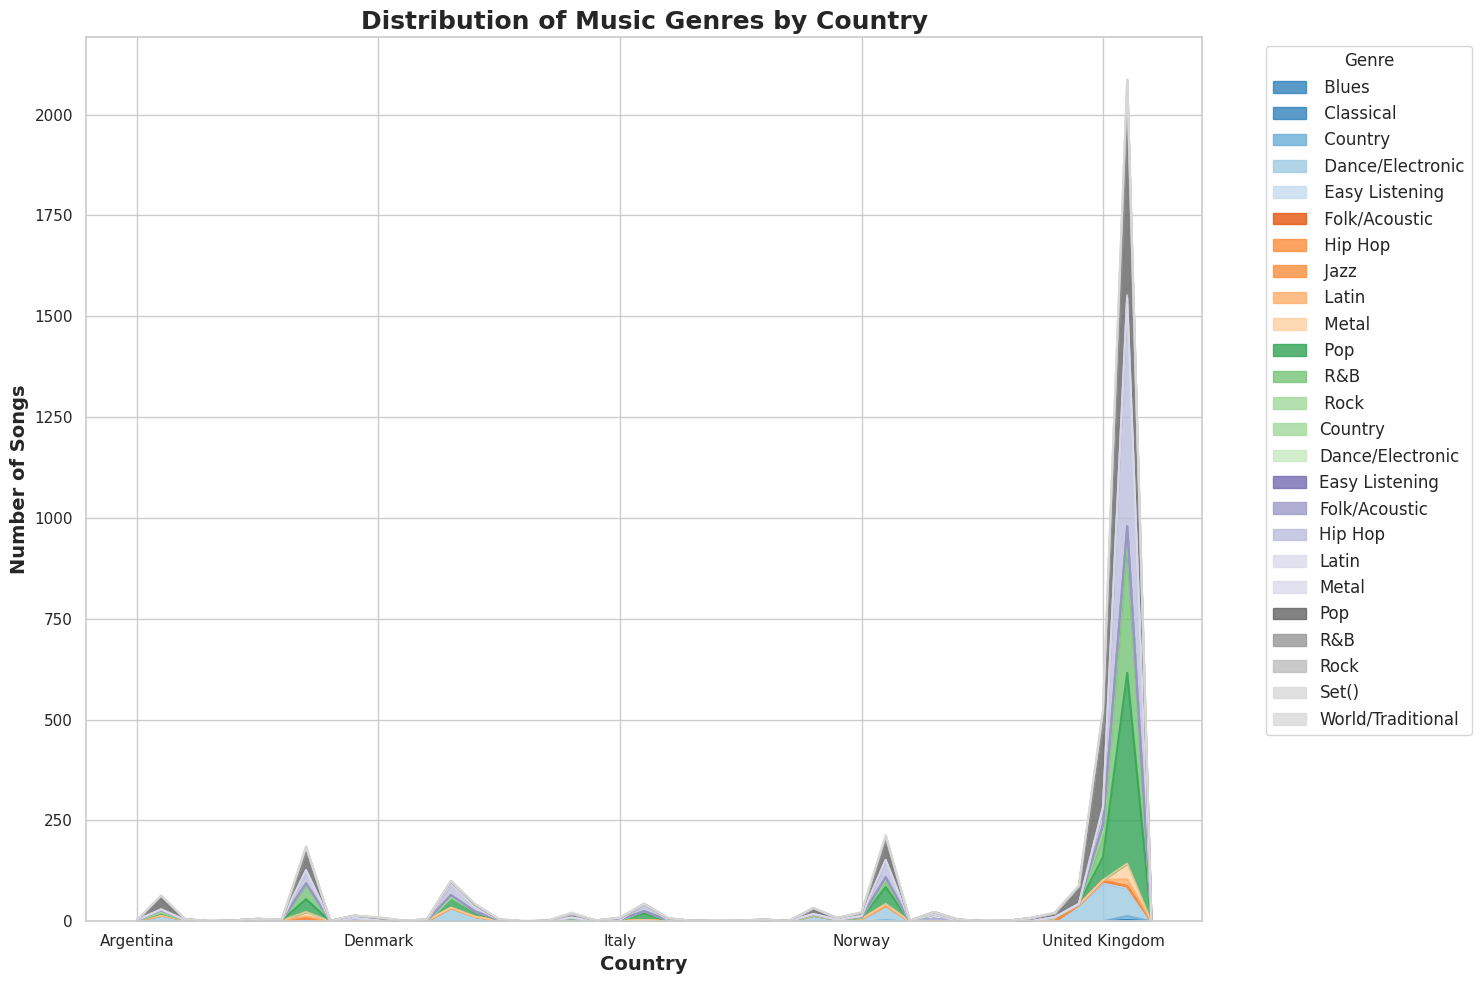

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/spotify_normalize_cleaned.csv'  # Update with the correct file path in Colab
data = pd.read_csv(file_path)

# Step 1: Normalize 'genre' column (convert list-like strings to actual lists)
data['genre'] = data['genre'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Step 2: Explode the 'genre' list into separate rows
exploded_data = data.explode('genre')

# Step 3: Group by 'country' and 'genre' to count the occurrences
genre_by_country = exploded_data.groupby(['country', 'genre']).size().unstack(fill_value=0)

# Step 4: Set a seaborn style for improved aesthetics
sns.set_theme(style='whitegrid')

# Step 5: Create the stacked area chart
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
genre_by_country.plot(kind='area', stacked=True, alpha=0.8, colormap='tab20c', ax=ax)

# Customization: Adding titles and labels
ax.set_title('Distribution of Music Genres by Country', fontsize=18, fontweight='bold')
ax.set_xlabel('Country', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Songs', fontsize=14, fontweight='bold')

# Add legend and improve its layout
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Improve layout
plt.tight_layout()

# Display the chart
plt.show()



# Data Visualization for Top 10 countries

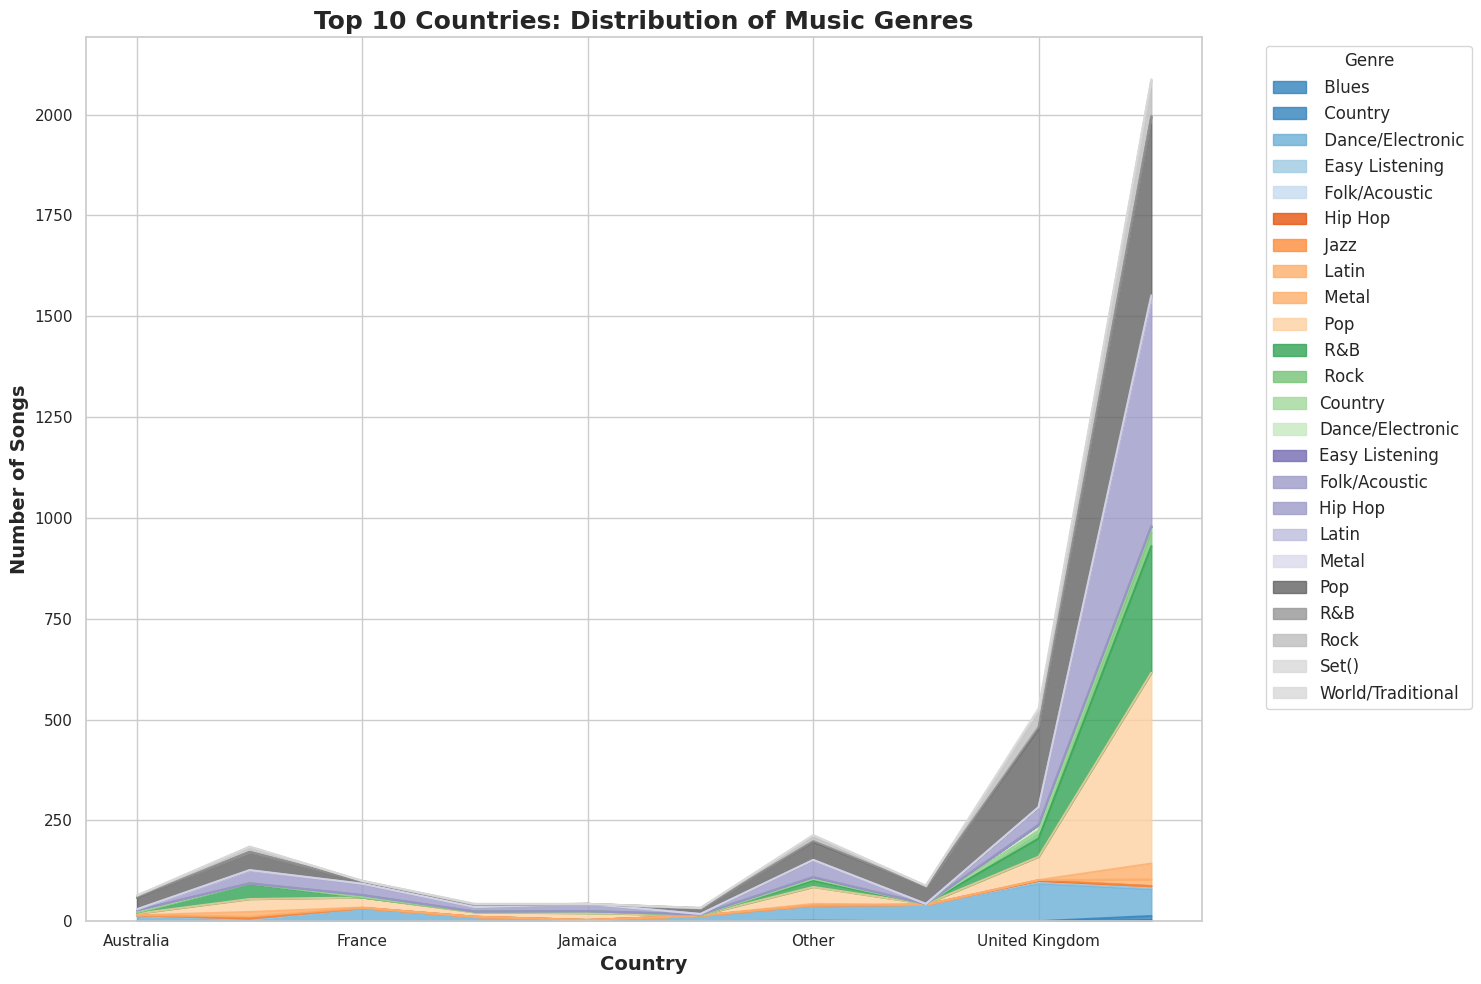

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/spotify_normalize_cleaned.csv'  # Update with the correct file path in Colab
data = pd.read_csv(file_path)

# Step 1: Normalize 'genre' column (convert list-like strings to actual lists)
data['genre'] = data['genre'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Step 2: Explode the 'genre' list into separate rows
exploded_data = data.explode('genre')

# Step 3: Calculate the total number of songs for each country and filter the top 10
top_countries = (
    exploded_data.groupby('country')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the data to only include the top 10 countries
filtered_data = exploded_data[exploded_data['country'].isin(top_countries)]

# Step 4: Group by 'country' and 'genre' to count the occurrences
genre_by_country = filtered_data.groupby(['country', 'genre']).size().unstack(fill_value=0)

# Step 5: Set a seaborn style for improved aesthetics
sns.set_theme(style='whitegrid')

# Step 6: Create the stacked area chart
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
genre_by_country.plot(kind='area', stacked=True, alpha=0.8, colormap='tab20c', ax=ax)

# Customization: Adding titles and labels
ax.set_title('Top 10 Countries: Distribution of Music Genres', fontsize=18, fontweight='bold')
ax.set_xlabel('Country', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Songs', fontsize=14, fontweight='bold')

# Add legend and improve its layout
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Improve layout
plt.tight_layout()

# Display the chart
plt.show()

